## CMPINF 2100 Week 11

### Introduction to working with more than 1 input

We will learn the basics of working with more than 1 input by focusing on 2 inputs in this notebook.

We will focus on INTERPRETATION in this notebook rather than FITTING models.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Introduction

We know how to work with 1 CONTINUOUS input in our LINEAR MODELS for REGRESSION.

Let's begin with ADDITIVE LINEAR relationships!!

### Additive 

#### Linear relationships

We will define a function that calculates the AVERAGE OUTPUT or TREND given input 1 and input 2 and the 3 regression coefficients.

The purpose of this function is to allow visualizing the TREND with respect to input 1.

In [2]:
def calc_trend_wrt_x1( x1, x2, b0, b1, b2 ):
    res_df = pd.DataFrame({'x1': x1})
    
    res_df['x2'] = x2
    
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2
    
    return res_df

To demonstrate the relationships, let's define the following COEFFICIENTS.

In [3]:
b0 = -0.25
b1 = 1.95
b2 = 0.2

Let's now define 101 evenly or uniformly spaced values of `x1` between -3 and 3.

In [4]:
x1_values = np.linspace(-3, 3, num=101)

In [5]:
x1_values.size

101

In [6]:
x1_values.ndim

1

Let's calculate the AVERAGE OUTPUT for a SINGLE value of `x2` at 0.

In [7]:
calc_trend_wrt_x1( x1_values, 0, b0, b1, b2 )

,x1,x2,trend
0,-3.00,0,-6.100
1,-2.94,0,-5.983
2,-2.88,0,-5.866
3,-2.82,0,-5.749
4,-2.76,0,-5.632
...,...,...,...
96,2.76,0,5.132
97,2.82,0,5.249
98,2.88,0,5.366
99,2.94,0,5.483


In [9]:
calc_trend_wrt_x1( x1_values, 0, b0, b1, b2 ).x2.value_counts()

0    101
Name: x2, dtype: int64

Let's visualize the RELATIONSHIP between the AVERAGE OUTPUT and INPUT 1.

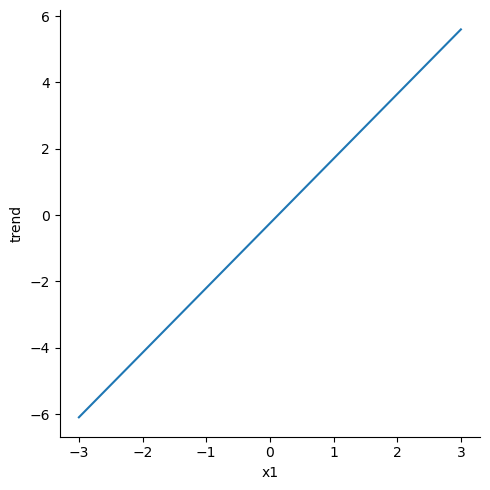

In [10]:
sns.relplot(data = calc_trend_wrt_x1(x1_values, 0, b0, b1, b2),
            x='x1', y='trend', kind='line')

plt.show()

But now what happens if we CHANGE `x2` from 0 to -2?!??!

In [11]:
calc_trend_wrt_x1( x1_values, -2, b0, b1, b2 )

,x1,x2,trend
0,-3.00,-2,-6.500
1,-2.94,-2,-6.383
2,-2.88,-2,-6.266
3,-2.82,-2,-6.149
4,-2.76,-2,-6.032
...,...,...,...
96,2.76,-2,4.732
97,2.82,-2,4.849
98,2.88,-2,4.966
99,2.94,-2,5.083


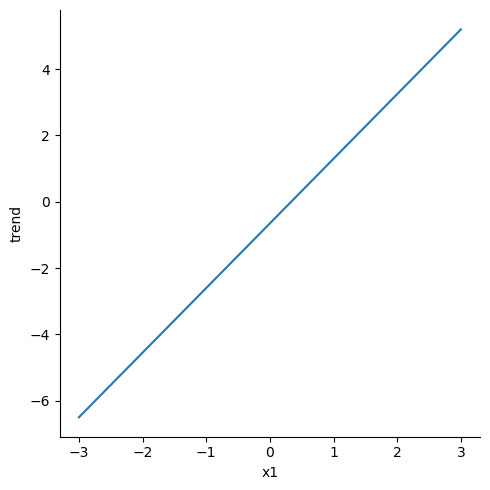

In [12]:
sns.relplot(data = calc_trend_wrt_x1(x1_values, -2, b0, b1, b2),
            x='x1', y='trend', kind='line')

plt.show()

Let's REPEAT or REPLICATE calculating the TREND with respect to `x1` FOR different values of `x2`!

In [13]:
x2_values = np.linspace(-3, 3, num=9)

In [14]:
x2_values

array([-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ])

We could use a for-loop to ITERATE but let's review LIST COMPREHENSIONS!!!

In [15]:
study_wrt_x1_list = [ calc_trend_wrt_x1(x1_values, x2, b0, b1, b2) for x2 in x2_values ]

In [16]:
len( study_wrt_x1_list )

9

In [17]:
study_wrt_x1_list[0]

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
96,2.76,-3.0,4.532
97,2.82,-3.0,4.649
98,2.88,-3.0,4.766
99,2.94,-3.0,4.883


In [18]:
study_wrt_x1_list[1]

,x1,x2,trend
0,-3.00,-2.25,-6.550
1,-2.94,-2.25,-6.433
2,-2.88,-2.25,-6.316
3,-2.82,-2.25,-6.199
4,-2.76,-2.25,-6.082
...,...,...,...
96,2.76,-2.25,4.682
97,2.82,-2.25,4.799
98,2.88,-2.25,4.916
99,2.94,-2.25,5.033


Let's combine or CONCAT the separate DataFrames together!

In [19]:
study_wrt_x1_df = pd.concat( study_wrt_x1_list, ignore_index=True )

In [20]:
study_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.583
2,-2.88,-3.0,-6.466
3,-2.82,-3.0,-6.349
4,-2.76,-3.0,-6.232
...,...,...,...
904,2.76,3.0,5.732
905,2.82,3.0,5.849
906,2.88,3.0,5.966
907,2.94,3.0,6.083


In [21]:
study_wrt_x1_df.x2.value_counts()

-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: x2, dtype: int64

Visualize the TREND or AVERAGE OUTPUT with respect to `x1` FOR EACH unique value of `x2` as a LINE CHART!!!

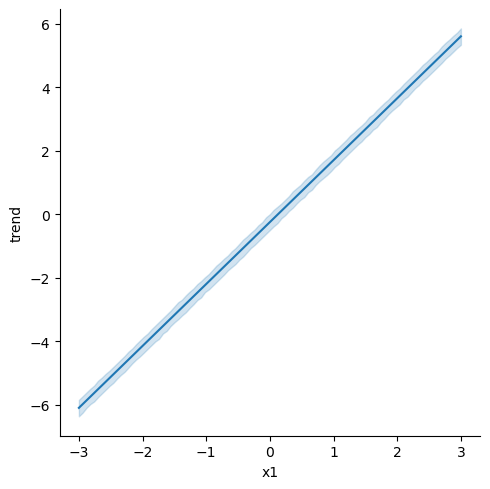

In [22]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='line')

plt.show()

By default Seaborn LINE CHARTS want to SUMMARIZE data and CALCULATE AVERAGE behavior of the y-axis variable with respect to the x-axis variable!!!!

Because the SCATTER PLOT does NOT average by default!!!

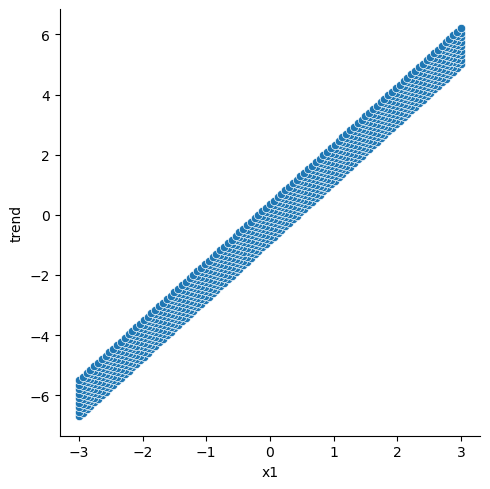

In [23]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='scatter')

plt.show()

We therefore need to DISABLE or TURN OFF Seaborn's DEFAULT line chart averaging!!!!!!

We must tell Seaborn to NOT calculate a SUMMARY estimator!!!

We must tell Seaborn WHAT DEFINES each LINE!!!! Seaborn refers to this as the UNITS of the line!!!!!

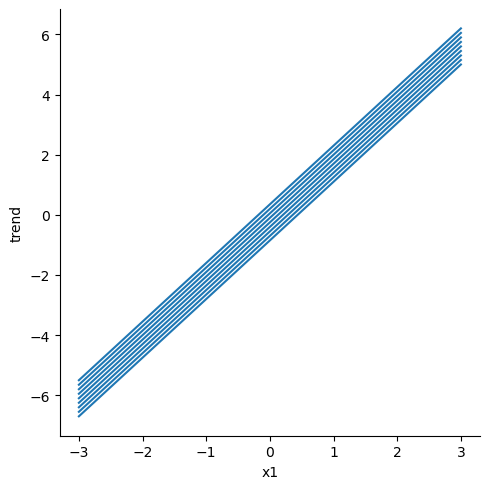

In [24]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='line',
            estimator=None, units='x2')

plt.show()

However, we cannot tell the difference between the lines! They all have the same color!

We can ASSOCIATE the line color to `x2` via the `hue` argument!!

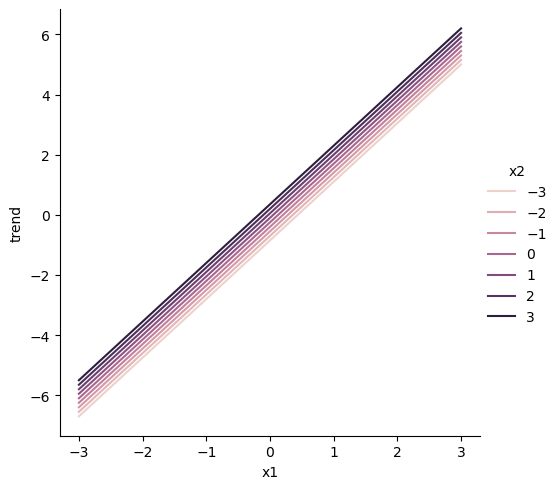

In [25]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='line',
            hue='x2',
            estimator=None, units='x2')

plt.show()

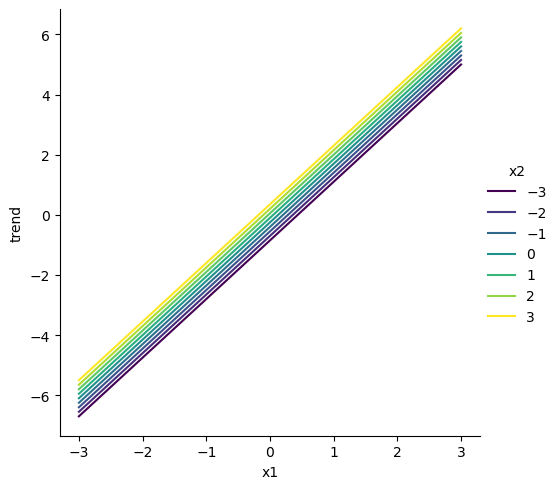

In [26]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='line',
            hue='x2', palette='viridis',
            estimator=None, units='x2')

plt.show()

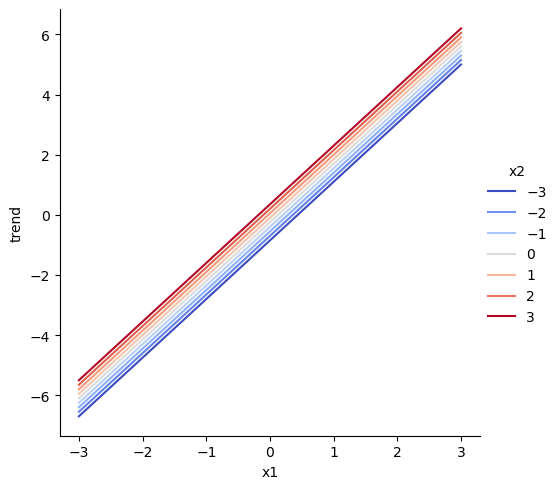

In [27]:
sns.relplot(data = study_wrt_x1_df,
            x='x1', y='trend', kind='line',
            hue='x2', palette='coolwarm',
            estimator=None, units='x2')

plt.show()

What's going on or Why does this matter????

ADDITIVE features ADD the effect of ONE INPUT to the OTHER!!!

IF the INPUTS have roughly the same MAGNITUDE and SCALE the MAGNITUDE of the SLOPE tells you which input causes the GREATER CHANGE on the AVERAGE OUTPUT!!!!!

Let's see one more time by FOCUSING on the relationship with respect to `x2`.

In [28]:
def calc_trend_wrt_x2( x1, x2, b0, b1, b2 ):
    res_df = pd.DataFrame({'x2': x2})
    
    res_df['x1'] = x1
    
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2
    
    return res_df

Let's define 2 new arrays so we can visualize the TRENDS with respect to `x2` for different values of `x1`.

In [29]:
x2_values_b = np.linspace(-3, 3, num=101)

In [30]:
x2_values_b.shape

(101,)

In [31]:
x1_values_b = np.linspace(-3, 3, num=9)

In [32]:
x1_values_b

array([-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ])

Let's use the LIST COMPREHENSION to iterate over the values of `x1`.

In [33]:
study_wrt_x2_list = [ calc_trend_wrt_x2(x1, x2_values_b, b0, b1, b2) for x1 in x1_values_b ]

In [34]:
len(study_wrt_x2_list)

9

In [35]:
study_wrt_x2_df = pd.concat( study_wrt_x2_list, ignore_index=True )

In [36]:
study_wrt_x2_df

,x2,x1,trend
0,-3.00,-3.0,-6.700
1,-2.94,-3.0,-6.688
2,-2.88,-3.0,-6.676
3,-2.82,-3.0,-6.664
4,-2.76,-3.0,-6.652
...,...,...,...
904,2.76,3.0,6.152
905,2.82,3.0,6.164
906,2.88,3.0,6.176
907,2.94,3.0,6.188


In [37]:
study_wrt_x2_df.x1.value_counts()

-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: x1, dtype: int64

Visualize the TREND or AVERAGE OUTPUT with respect to `x2` for each unique value of `x1`. Use the DIVERGING color palette to help distinguish `x1` values ABOVE and BELOW the `x1` MIDPOINT.

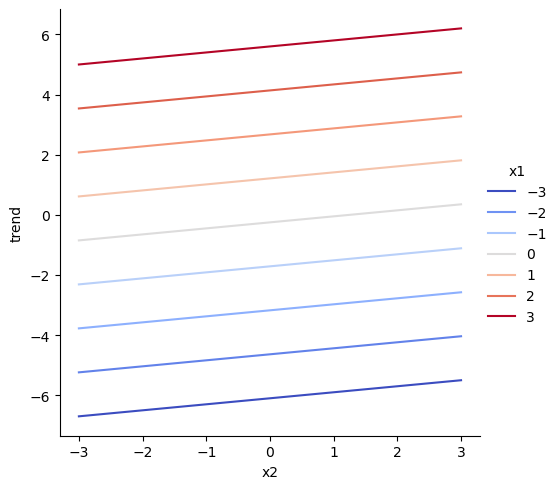

In [38]:
sns.relplot(data = study_wrt_x2_df,
            x='x2', y='trend', kind='line',
            hue='x1', palette='coolwarm',
            estimator=None, units='x1')

plt.show()

All concepts APPLY whether I had DIFFERENT SIGNS for the SLOPES. Or if the SLOPE multiplying input 2 was greater than the slope multiplying input 1!!!

### Interactions

Let's define another function that calculates the TREND or AVERAGE OUTPUT focusing on the RELATIONSHIP with `x1`. But, this time we will have the INTERACTION FEATURES which equals the PRODUCT of the two inputs!!!

In [39]:
def calc_trend_wrt_x1_with_interaction( x1, x2, b0, b1, b2, b3 ):
    res_df = pd.DataFrame({'x1': x1})
    
    res_df['x2'] = x2
    
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2 + b3 * res_df.x1 * res_df.x2
    
    return res_df

We need a SLOPE defined that multiplies the INTERACTION feature!!

In [40]:
b3 = 1

Let's calculate the TREND with respect to `x1` for DIFFERENT values of `x2`.

In [41]:
study_interaction_wrt_x1_list = [calc_trend_wrt_x1_with_interaction(x1_values, x2, b0, b1, b2, b3) for x2 in x2_values]

In [42]:
len(study_interaction_wrt_x1_list)

9

In [43]:
study_interaction_wrt_x1_df = pd.concat( study_interaction_wrt_x1_list, ignore_index=True )

In [44]:
study_interaction_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,2.300
1,-2.94,-3.0,2.237
2,-2.88,-3.0,2.174
3,-2.82,-3.0,2.111
4,-2.76,-3.0,2.048
...,...,...,...
904,2.76,3.0,14.012
905,2.82,3.0,14.309
906,2.88,3.0,14.606
907,2.94,3.0,14.903


In [45]:
study_interaction_wrt_x1_df.x2.value_counts()

-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: x2, dtype: int64

Let's now VISUALIZE the AVERAGE OUTPUT or TREND with respect to `x1` for each `x2` unique value.

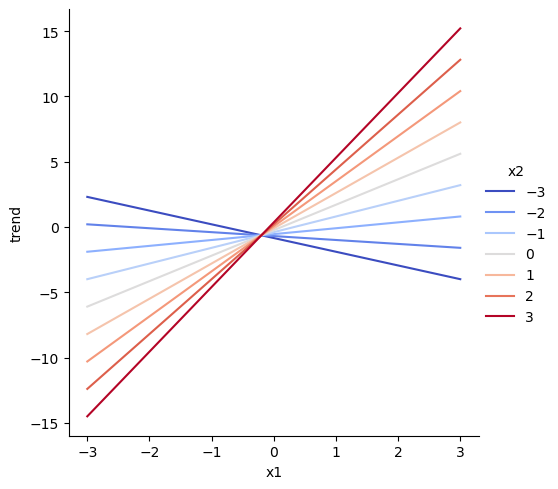

In [46]:
sns.relplot(data = study_interaction_wrt_x1_df,
            x='x1', y='trend', kind='line',
            hue='x2', palette='coolwarm',
            estimator=None, units='x2')

plt.show()

INTERACTION represents that the RELATIONSHIP with respect 1 INPUT **DEPENDS** on the OTHER INPUT!!!!!!!

The same idea holds for the RELATIONSHIP with respect to `x2`.

In [47]:
def calc_trend_wrt_x2_with_interaction( x1, x2, b0, b1, b2, b3 ):
    res_df = pd.DataFrame({'x2': x2})
    
    res_df['x1'] = x1
    
    res_df['trend'] = b0 + b1 * res_df.x1 + b2 * res_df.x2 + b3 * res_df.x1 * res_df.x2
    
    return res_df

In [48]:
study_interaction_wrt_x2_list = [ calc_trend_wrt_x2_with_interaction(x1, x2_values_b, b0, b1, b2, b3) for x1 in x1_values_b ]

In [49]:
study_interaction_wrt_x2_df = pd.concat( study_interaction_wrt_x2_list, ignore_index=True )

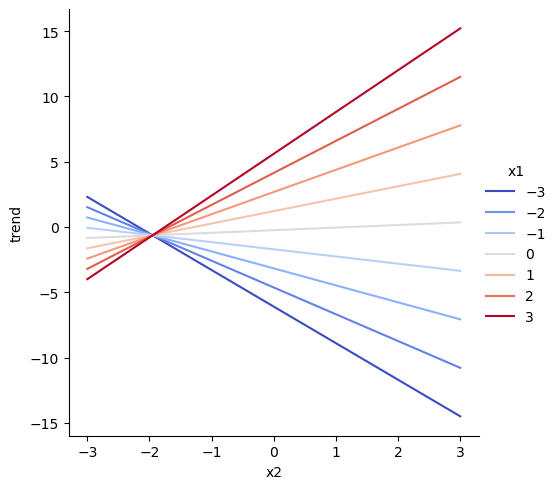

In [50]:
sns.relplot(data = study_interaction_wrt_x2_df,
            x='x2', y='trend', kind='line',
            hue='x1', palette='coolwarm',
            estimator=None, units='x1')

plt.show()

The RELATIONSHIP of the AVERAGE OUTPUT with respect to 1 INPUT DEPENDS on the OTHER INPUT!!!!

INTERACTIONS provide a lot of FLEXIBILITY!!!! 

INTERACTIONS allow the INPUTS to IMPACT the behavior of OTHER inputs!!!!!